In [1]:
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras as kr
import matplotlib.pyplot as plt
%matplotlib inline
n_rows, n_cols = 2, 5
classes = [ 'T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' ]
print(tf.__version__)
print(kr.__version__)

2.0.0
2.2.4-tf


In [2]:
"""Helper Functions"""
# Function vectorize ouput y in training dataset
def vector_y(k):
    y = np.zeros((len(classes), 1))
    y[k] = 1.0
    return y 

# Function displays images in a dataset
def show_images(dataset, kind, rows, cols):
    print("{} dataset's dimension in:\nX = {},\ny = {}"\
          .format(kind, dataset[0].shape, dataset[1].shape))
    # Set plot's configuration
    im_size = 12
    fig = plt.figure(figsize=(im_size, im_size))
    fig.suptitle("{} Dataset".format(kind))
    list_indx = random.sample(range(dataset[0].shape[0]), cols * rows)
    # Plot images
    for k in range(1, cols * rows + 1):
        j = list_indx[k - 1]
        img = dataset[0][j].reshape((28,28))
        lab = "{} / {}".format(classes[ dataset[1][j] ], j)
        fig.add_subplot(rows, cols, k, title=lab)
        plt.imshow(img, cmap='gray')
    plt.show()

# Function shows the histogram and kernel densitive estimation of all samples in a dataset
import numpy as np
def show_distributions(dataset, kind):
    fig, axes = plt.subplots(2, figsize=(10,12), sharex=True)
    dataset[0].plot(ax=axes[0], kind='hist', bins=50, width=0.5)
    dataset[0].plot(ax=axes[1], kind='kde', xlim=(-0.5, 9.5), xticks=np.arange(0,10,1))
    fig.suptitle("{} Dataset".format(kind))
    
def show_imgs(dataset, kind, rows, cols):
    # Set plot's configuration
    im_size = 12
    fig = plt.figure(figsize=(im_size, im_size))
    fig.suptitle("{} Dataset".format(kind))
    # Plot images
    list_indx = random.sample(range(len(dataset)) , cols * rows)
    for k in range(1, cols * rows + 1):
        sample = list_indx[k - 1]
        img = dataset.iloc[sample, 1:].values.reshape(28,28)
        lab = "{} / {}".format(classes[ int(dataset.iloc[sample, 0]) ], sample)
        fig.add_subplot(rows, cols, k, title=lab)
        plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
# Load Fashion-MNIST data in Keras library
(train_images, train_labels), (test_images, test_labels) = kr.datasets.fashion_mnist.load_data()

Training dataset's dimension in:
X = (60000, 28, 28),
y = (60000,)


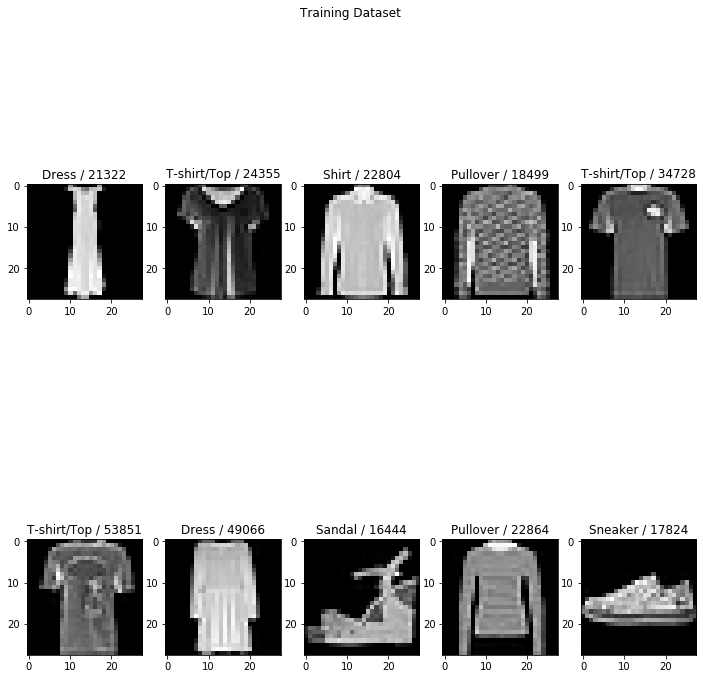

In [4]:
# Display several images in the training dataset
show_images((train_images, train_labels), "Training", n_rows, n_cols)

In [5]:
# Create training,  validation, testing datasets using zip(features, labels)
train_x = [ np.reshape(x, (784, 1)) for x in train_images ]
train_y = [ vector_y(y) for y in train_labels ]
test_x = [ np.reshape(x, (784, 1)) for x in test_images ]
train_set = zip(train_x, train_y)
train_set = list(train_set)
random.shuffle(train_set)
val_set  = train_set[:10000]
train_set = train_set[10000:]
test_set = zip(test_images, test_labels)
test_set = list(test_set)

In [6]:
# Save collection of 3 dataset in .csv files
partitions = [ ("train", train_set), ("validation", val_set), ("test", test_set) ]
for name, partition in partitions:
    print("{} dataset: {} ...".format(name, len(partition)))
    samples = [ np.reshape(f[0], (784, )) for f in partition ]
    if (name != "test"):
        labels = [ np.argmax(l[1]) for l in partition ]
        samples = np.insert(samples, 0, labels, axis=1)
    # Save datasets in csv format
    np.savetxt("{}.csv".format(name), samples, delimiter=',')
print("Process complete!")

train dataset: 50000 ...
validation dataset: 10000 ...
test dataset: 10000 ...
Process complete!


In [7]:
# Read the training dataset from file
import pandas as pd
df_train = pd.read_csv("train.csv", header=None)
df_train.head(n_rows * n_cols)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,121.0,107.0,66.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,157.0,...,123.0,122.0,99.0,153.0,95.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,10.0,113.0,80.0,50.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,88.0,83.0,131.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,...,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


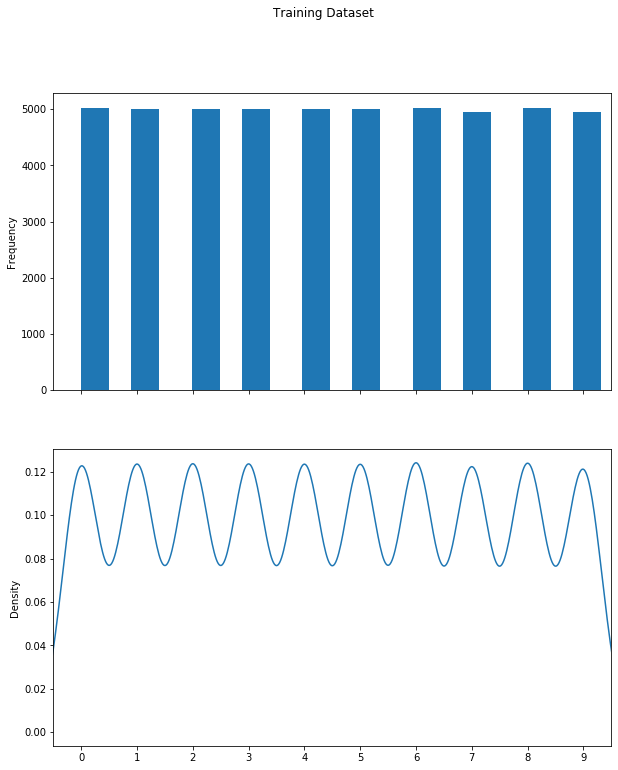

In [8]:
# Show the distribution of the training dataset
show_distributions(df_train, "Training")

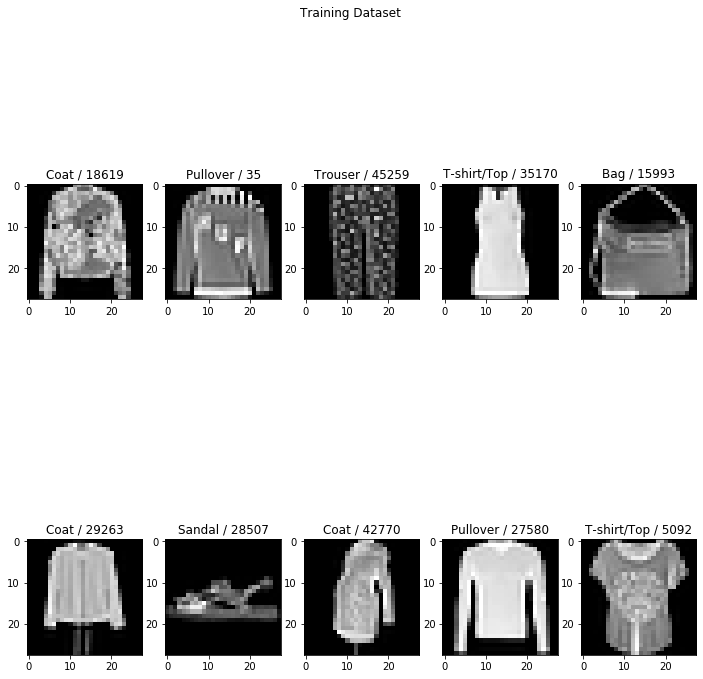

In [9]:
# Show several images in the training dataset
show_imgs(df_train, "Training", n_rows, n_cols)

In [10]:
# Read the validation dataset from file
df_val = pd.read_csv("validation.csv", header=None)
df_val.head(n_rows * n_cols)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,73.0,71.0,87.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,76.0,99.0,63.0,0.0,3.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,167.0,177.0,40.0,0.0,0.0,0.0
9,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


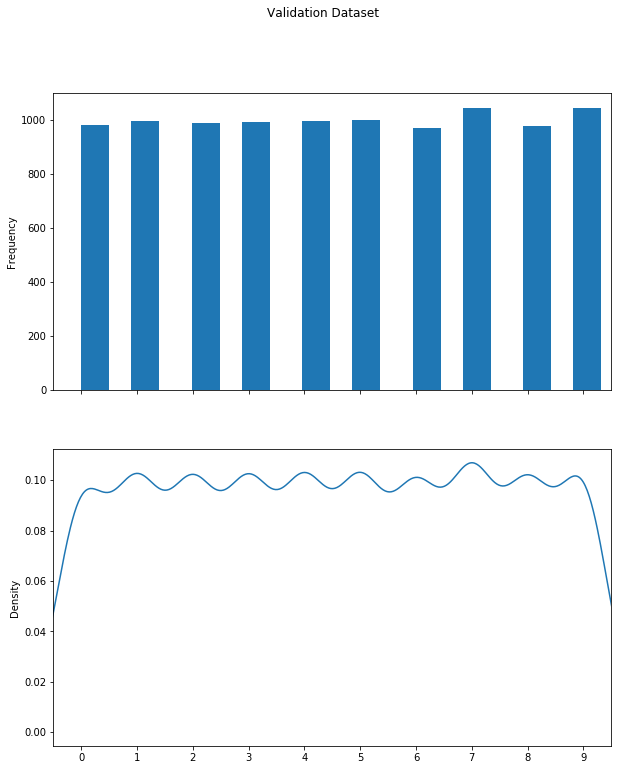

In [11]:
# Show the distribution of the validation dataset
show_distributions(df_val, "Validation")

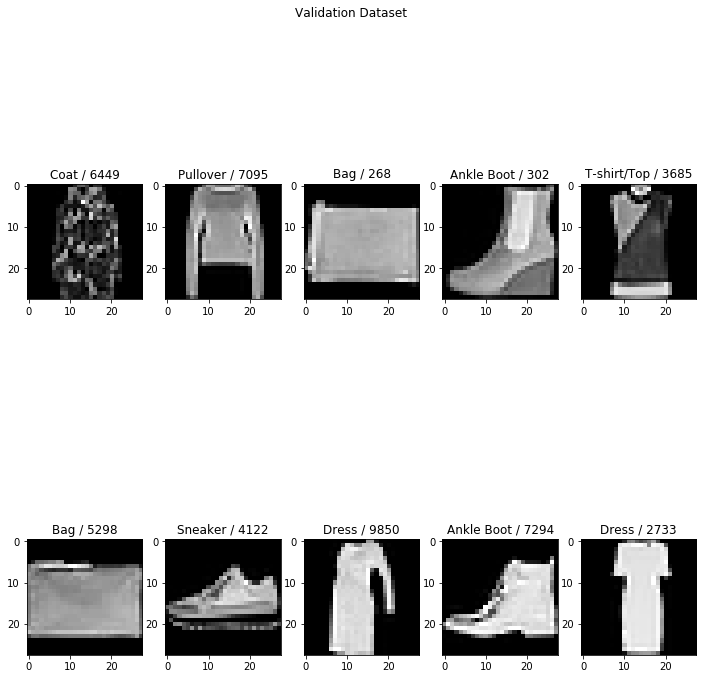

In [12]:
show_imgs(df_val, "Validation", n_rows, n_cols)

In [13]:
# Read the testing dataset in file
df_test = pd.read_csv("test.csv", header=None)
df_test.head(n_rows * n_cols)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,3.0,174.0,189.0,67.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,164.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,71.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,129.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,36.0,30.0,27.0,27.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,10.0,0.0,0.0,35.0,84.0,55.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
